<a href="https://colab.research.google.com/github/hongsamhc2/AutoTradingSystem/blob/master/%EC%A1%B0%ED%9B%88%EC%B0%BD/ML_Stock_Data_Analysis_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
df = pd.read_csv('/content/drive/My Drive/datasets/stock/DA000020.csv')

In [188]:
# API 에서 받은 데이터는 최신 날짜 기준으로 정렬 되어 있습니다.
df.head()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
0,20201016,0,22750,22950,20750,21550,-1200,907694,19455000000,600960,297637,27931000,601923000000,866103,3.10,100.0,-58544,0,0.0,0,0.0,0.0,53
1,20201015,0,23850,23850,22450,22750,-1100,508031,11652000000,312005,182085,27931000,635430000000,866103,3.10,100.0,329,0,0.0,0,0.0,0.0,53
2,20201014,0,23900,24200,23600,23850,-450,420287,10026000000,231880,180627,27931000,666154000000,882497,3.16,100.0,-2785,0,0.0,0,0.0,0.0,53
3,20201013,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.0,-2650,0,0.0,0,0.0,0.0,50
4,20201012,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.0,1022,0,0.0,0,0.0,0.0,53


In [189]:
# 과거 데이터부터 정렬

df.sort_values(by='date',ascending=True,inplace=True)
df.head()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
10945,19800104,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10944,19800105,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10943,19800107,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10942,19800108,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
10941,19800109,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32


In [190]:
# 날짜 컬럼 데이터 타입 변경 => datetime

df['date'] = df['date'].astype('str')
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946 entries, 10945 to 0
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           10946 non-null  datetime64[ns]
 1   time           10946 non-null  int64         
 2   open           10946 non-null  int64         
 3   high           10946 non-null  int64         
 4   low            10946 non-null  int64         
 5   close          10946 non-null  int64         
 6   prev           10946 non-null  int64         
 7   volume         10946 non-null  int64         
 8   tr_amount      10946 non-null  int64         
 9   sales_qu       10946 non-null  int64         
 10  purchase_qu    10946 non-null  int64         
 11  li_share       10946 non-null  int64         
 12  market_cap     10946 non-null  int64         
 13  fr_cu_holding  10946 non-null  int64         
 14  fr_cu_ratio    10946 non-null  float64       
 15  ad_pr_ratio    1094

In [191]:
# 데이터프레임 index로 날짜 칼럼을 지정

df.set_index(df['date'], inplace=True)
df.head()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
date,,,,,,,,,,,,,,,,,,,,,,,
1980-01-04,1980-01-04,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-05,1980-01-05,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-07,1980-01-07,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-08,1980-01-08,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-09,1980-01-09,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32


In [192]:
# 최근 100일 데이터

df_len = len(df)
df_100_start = len(df)-100
df_100 = df.iloc[df_100_start:]
df_100

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
date,,,,,,,,,,,,,,,,,,,,,,,
2020-05-25,2020-05-25,0,10250,10450,10000,10300,50,453897,4627000000,264776,186377,27931000,287689000000,1588867,5.69,100.0,-8268,0,0.0,0,0.0,0.0,50
2020-05-26,2020-05-26,0,10400,10400,10050,10150,-150,250626,2544000000,140959,99630,27931000,283499000000,1567254,5.61,100.0,1806,0,0.0,0,0.0,0.0,53
2020-05-27,2020-05-27,0,10650,12450,10600,11300,1150,6795894,78614000000,3354240,3410512,27931000,315620000000,1451366,5.20,100.0,10245,0,0.0,0,0.0,0.0,50
2020-05-28,2020-05-28,0,11350,11350,10450,10800,-500,1106251,12063000000,665363,425516,27931000,301654000000,1472470,5.27,100.0,4757,0,0.0,0,0.0,0.0,53
2020-05-29,2020-05-29,0,10900,12150,10850,11550,750,4470917,51931000000,2127166,2311691,27931000,322603000000,1475601,5.28,100.0,34080,0,0.0,0,0.0,0.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-12,2020-10-12,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.0,1022,0,0.0,0,0.0,0.0,53
2020-10-13,2020-10-13,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.0,-2650,0,0.0,0,0.0,0.0,50
2020-10-14,2020-10-14,0,23900,24200,23600,23850,-450,420287,10026000000,231880,180627,27931000,666154000000,882497,3.16,100.0,-2785,0,0.0,0,0.0,0.0,53


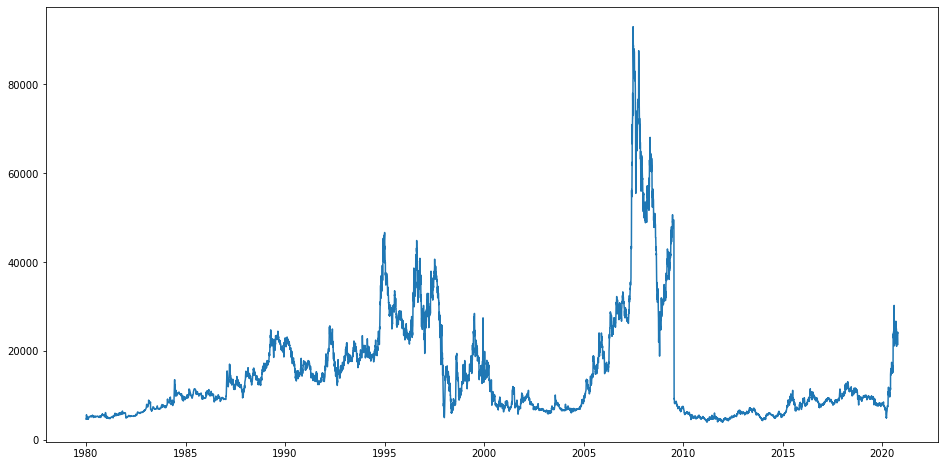

In [193]:
# 최근 100일 데이터 종가 라인 그래프
df.index.astype('str')
plt.figure(figsize=(16,8))

plt.plot(df.index,df['close'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


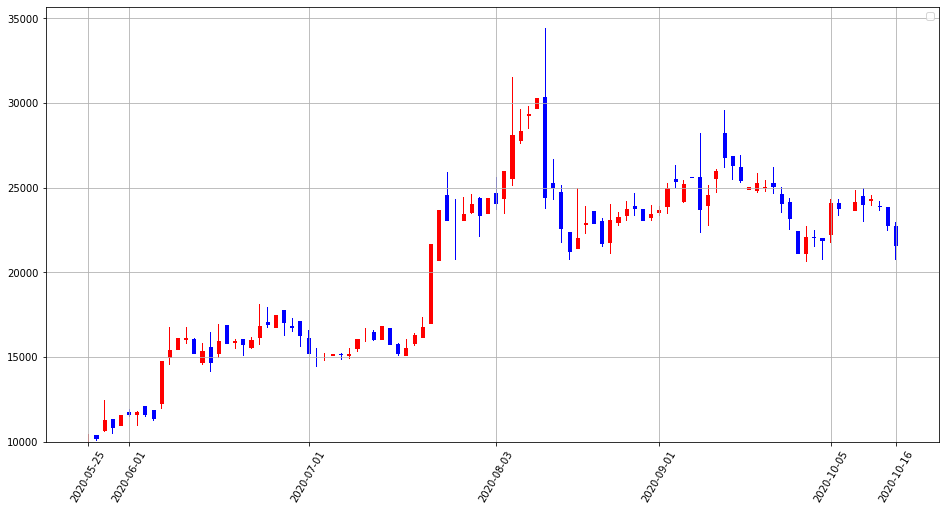

In [194]:
# 최근 100일 봉차트 그리기

# 1. 시가와 종가의 차이 데이터 
df['diff'] = df['close'] - df['open']

# 2. color
df['color'] ='blue'
for i in range(len(df)):
  if df['diff'].iloc[i] >= 0:
    df['color'].iloc[i] = 'red'
  else:
    df['color'].iloc[i] ='blue'
df[['diff','color']].tail()
# 3. 날짜 1일 리스트 만들기
def first_day_list(df):
  date = []
  date.append(df['date'].iloc[0])
  for i in range(len(df)-1):
    date_cu = df['date'].iloc[i]
    date_cu = date_cu.split('-')
    date_ne = df['date'].iloc[i+1]
    date_ne = date_ne.split('-')
    if date_cu[1] != date_ne[1]:
      date.append('-'.join(date_ne))
  if df['date'].iloc[-1] not in date:
    date.append(df['date'].iloc[-1])
  return date

# 4. barchart

df_100 = df.iloc[df_100_start:]
df_100['date'] = df_100['date'].astype('str')
first_day_list = first_day_list(df_100)
plt.figure(figsize=(16,8))
plt.bar(df_100['date'],df_100['diff'],width = 0.5,bottom= df_100['open'],color=df_100['color'])
plt.bar(df_100['date'],df_100['high']-df_100['low'],width=0.1,bottom = df_100['low'],color=df_100['color'])
plt.xticks(first_day_list,rotation = '60')
plt.grid()
plt.legend()

In [195]:
# label 컬럼 생성 => 다음날 종가 

df['label'] = df['close'].shift(-1)

df[['close','label']]

,close,label
date,,
1980-01-04,4700,4700.0
1980-01-05,4700,4990.0
1980-01-07,4990,5290.0
1980-01-08,5290,5700.0
1980-01-09,5700,5700.0
...,...,...
2020-10-12,24000,24300.0
2020-10-13,24300,23850.0
2020-10-14,23850,22750.0


In [196]:
# 결측치 값있는 행 삭제

df.dropna(inplace=True)
df.tail()

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign,diff,color,label
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-08,2020-10-08,0,23600,24850,23600,24150,650,716608,17399000000,312273,383482,27931000,674533000000,910980,3.26,100.0,6024,0,0.0,0,0.0,0.0,50,550,red,24000.0
2020-10-12,2020-10-12,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.0,1022,0,0.0,0,0.0,0.0,53,-500,blue,24300.0
2020-10-13,2020-10-13,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.0,-2650,0,0.0,0,0.0,0.0,50,100,red,23850.0
2020-10-14,2020-10-14,0,23900,24200,23600,23850,-450,420287,10026000000,231880,180627,27931000,666154000000,882497,3.16,100.0,-2785,0,0.0,0,0.0,0.0,53,-50,blue,22750.0
2020-10-15,2020-10-15,0,23850,23850,22450,22750,-1100,508031,11652000000,312005,182085,27931000,635430000000,866103,3.10,100.0,329,0,0.0,0,0.0,0.0,53,-1100,blue,21550.0


In [197]:
# feature 와 label 데이터셋 생성  / feature 데이터는 종가 
y_label = df['label'].copy()
X_feature = df['close'].copy()

print('y_label Shape : \n' , y_label.shape)
print('X_feature Shape : \n', X_feature.shape)

y_label Shape : 
 (10945,)
X_feature Shape : 
 (10945,)


In [198]:
# X_featrue 를 2차원 배열로 변경

X_feature = X_feature.values.reshape(-1,1)


In [199]:
print(X_feature.shape)

(10945, 1)


In [200]:
# 훈련 / 테스트 셋으로 분리

from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X_feature,y_label, train_size = 0.8, shuffle = False)

In [201]:
# LinearRegression 

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train,y_train)
lin_pred = lin.predict(X_test)
lin_pred

array([ 4562.37944526,  4522.45430542,  4547.40751782, ...,
       24285.39852702, 23836.2407038 , 22738.29935815])

In [202]:
# MSE check

from sklearn.metrics import mean_squared_error

In [203]:
lin_score = mean_squared_error(y_test,lin_pred)
lin_score

100194.94052964303

In [204]:
rmse = np.sqrt(lin_score)
rmse

316.535843988707

In [205]:
# cross validation

from sklearn.model_selection import cross_val_score

mean_sq = cross_val_score(lin,X_train,y_train,scoring='neg_mean_squared_error',cv=100)
mean_sq

array([-1.10735744e+04, -2.87245643e+03, -2.85844419e+03, -2.23766865e+04,
       -3.79014118e+03, -7.98064205e+03, -1.90087779e+04, -1.86157796e+03,
       -3.42764472e+03, -1.58556409e+03, -4.58359310e+04, -5.65505097e+03,
       -8.17286966e+03, -1.66318674e+04, -8.43257335e+04, -2.56509284e+04,
       -2.69413629e+04, -2.19221047e+04, -2.04249770e+04, -1.34372237e+04,
       -3.55708996e+04, -2.00210048e+04, -1.19002313e+04, -1.23281946e+05,
       -1.39525800e+05, -6.61449622e+04, -9.79986142e+04, -7.51509405e+04,
       -5.42205543e+04, -6.98724840e+04, -1.41578752e+05, -1.72367313e+05,
       -6.26784881e+04, -1.38088663e+05, -1.27895031e+05, -1.52596046e+05,
       -1.17732690e+05, -7.60901656e+04, -8.02059047e+04, -9.34295506e+04,
       -2.91812050e+05, -2.71578262e+05, -1.95141625e+05, -2.22607125e+05,
       -1.03411172e+05, -1.61409704e+05, -2.71744823e+05, -1.63682736e+05,
       -2.42887102e+05, -1.07977665e+06, -4.98651056e+05, -3.99076570e+05,
       -2.18219359e+05, -

In [206]:
rmse = np.sqrt(-mean_sq)
rmse

array([ 105.23105247,   53.59530235,   53.46441983,  149.58839041,
         61.56412248,   89.33443932,  137.87232461,   43.14600745,
         58.54609056,   39.81914228,  214.09327635,   75.20007296,
         90.40392501,  128.96459728,  290.38893484,  160.15907209,
        164.13824329,  148.06115203,  142.91597886,  115.91903946,
        188.60249109,  141.49559987,  109.08818141,  351.11528824,
        373.53152517,  257.18662903,  313.04730346,  274.13671867,
        232.85307439,  264.33403869,  376.26952075,  415.17142578,
        250.35672171,  371.60283014,  357.62414725,  390.63543811,
        343.12197499,  275.84445907,  283.20647013,  305.66247825,
        540.19630667,  521.1317128 ,  441.74837256,  471.81259485,
        321.5760757 ,  401.758266  ,  521.2914952 ,  404.57723138,
        492.83577629, 1039.12301902,  706.15228964,  631.72507497,
        467.13955006,  548.66034737,  947.28780554, 1294.14077437,
       1103.15473504,  964.86574814,  739.65548462, 1099.44527

In [207]:
df

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign,diff,color,label
date,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-01-04,1980-01-04,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,0,red,4700.0
1980-01-05,1980-01-05,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,0,red,4990.0
1980-01-07,1980-01-07,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,0,red,5290.0
1980-01-08,1980-01-08,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,0,red,5700.0
1980-01-09,1980-01-09,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,0,red,5700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08,2020-10-08,0,23600,24850,23600,24150,650,716608,17399000000,312273,383482,27931000,674533000000,910980,3.26,100.00,6024,0,0.0,0,0.0,0.0,50,550,red,24000.0
2020-10-12,2020-10-12,0,24500,24950,22950,24000,-150,540131,13039000000,345599,186894,27931000,670344000000,873556,3.13,100.00,1022,0,0.0,0,0.0,0.0,53,-500,blue,24300.0
2020-10-13,2020-10-13,0,24200,24550,23900,24300,300,426678,10342000000,226866,185194,27931000,678723000000,872813,3.12,100.00,-2650,0,0.0,0,0.0,0.0,50,100,red,23850.0


In [208]:
columns = ['close','open','high','low','volume']
df_ = df[columns]

In [209]:
len(df_.columns)

5

In [210]:
def get_subset(df):
  N = len(df.columns)
  result_list = []
  for i in range(1<<N):
    subset_list = []
    for j in range(N):
      if i & (1<<j):
        subset_list.append(j)
    if 0 in subset_list:
     result_list.append(subset_list)
  return result_list

In [231]:
from sklearn.metrics import r2_score

def train_linear_reg_subset_r2(df):

  columns_index_list = get_subset(df_)
  for i in columns_index_list:
    X_features = df.iloc[:,i]
    X_train, X_test, y_train, y_test = train_test_split(X_features,y_label,shuffle=False, train_size = 0.8)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    lin_pred = lin_reg.predict(X_test)
    scores = r2_score(y_test,lin_pred)
    print(X_features.columns)
    print('scores : {}'.format(scores))

In [228]:
def train_linear_reg_subset(df):

  columns_index_list = get_subset(df_)
  for i in columns_index_list:
    X_features = df.iloc[:,i]
    X_train, X_test, y_train, y_test = train_test_split(X_features,y_label,shuffle=False, train_size = 0.8)
    lin_reg = LinearRegression()
    lin_scores = cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv = 10)
    lin_rmse_scores = np.sqrt(-lin_scores)
    avg_rmse = np.mean(lin_rmse_scores)
    print('Used Columns',df.columns[i])
    print('CV = 10 | negative MSE : ',np.round(lin_scores ,3))
    print('CV = 10 | RMSE : ',np.round(lin_rmse_scores,3))
    print('cv = 10 | SVG : ', np.round(avg_rmse,3))

In [229]:
train_linear_reg_subset(df_)

Used Columns Index(['close'], dtype='object')
CV = 10 | negative MSE :  [   -7815.885   -27070.061   -69263.883  -112354.5    -272949.793
  -810000.961  -527495.71    -52528.397 -1788484.567 -2335876.868]
CV = 10 | RMSE :  [  88.407  164.53   263.18   335.193  522.446  900.001  726.289  229.191
 1337.342 1528.358]
cv = 10 | SVG :  609.494
Used Columns Index(['close', 'open'], dtype='object')
CV = 10 | negative MSE :  [   -7923.679   -26611.659   -68036.43   -114641.665  -268857.709
  -792606.69   -520518.583   -53155.871 -1765739.138 -2348700.327]
CV = 10 | RMSE :  [  89.015  163.131  260.838  338.588  518.515  890.285  721.47   230.556
 1328.811 1532.547]
cv = 10 | SVG :  607.375
Used Columns Index(['close', 'high'], dtype='object')
CV = 10 | negative MSE :  [   -7958.835   -27224.561   -69486.144  -114186.513  -270415.206
  -805396.314  -522658.154   -52444.34  -1787104.11  -2352064.243]
CV = 10 | RMSE :  [  89.212  164.999  263.602  337.915  520.015  897.439  722.951  229.007
 1336.

In [232]:
train_linear_reg_subset_r2(df_)

Index(['close'], dtype='object')
scores : 0.9915661893202814
Index(['close', 'open'], dtype='object')
scores : 0.9915414842183967
Index(['close', 'high'], dtype='object')
scores : 0.9915017651444754
Index(['close', 'open', 'high'], dtype='object')
scores : 0.9915645162414284
Index(['close', 'low'], dtype='object')
scores : 0.9916208717803475
Index(['close', 'open', 'low'], dtype='object')
scores : 0.9915285016477134
Index(['close', 'high', 'low'], dtype='object')
scores : 0.9915788019300398
Index(['close', 'open', 'high', 'low'], dtype='object')
scores : 0.9915472519309538
Index(['close', 'volume'], dtype='object')
scores : 0.9894776537780632
Index(['close', 'open', 'volume'], dtype='object')
scores : 0.9897438490129836
Index(['close', 'high', 'volume'], dtype='object')
scores : 0.9906517235719068
Index(['close', 'open', 'high', 'volume'], dtype='object')
scores : 0.9880471495757897
Index(['close', 'low', 'volume'], dtype='object')
scores : 0.987458608166342
Index(['close', 'open', 'lo

In [233]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df_scaler = scaler.fit_transform(df_)
df_scaled = pd.DataFrame(df_scaler,columns = columns, index = df_.index)

In [214]:
train_linear_reg_subset(df_scaled)

Used Columns Index(['close'], dtype='object')
CV = 10 | negative MSE :  [   -7815.885   -27070.061   -69263.883  -112354.5    -272949.793
  -810000.961  -527495.71    -52528.397 -1788484.567 -2335876.868]
CV = 10 | RMSE :  [  88.407  164.53   263.18   335.193  522.446  900.001  726.289  229.191
 1337.342 1528.358]
cv = 10 | SVG :  609.494
Used Columns Index(['close', 'open'], dtype='object')
CV = 10 | negative MSE :  [   -7923.679   -26611.659   -68036.43   -114641.665  -268857.709
  -792606.69   -520518.583   -53155.871 -1765739.138 -2348700.327]
CV = 10 | RMSE :  [  89.015  163.131  260.838  338.588  518.515  890.285  721.47   230.556
 1328.811 1532.547]
cv = 10 | SVG :  607.375
Used Columns Index(['close', 'high'], dtype='object')
CV = 10 | negative MSE :  [   -7958.835   -27224.561   -69486.144  -114186.513  -270415.206
  -805396.314  -522658.154   -52444.34  -1787104.11  -2352064.243]
CV = 10 | RMSE :  [  89.212  164.999  263.602  337.915  520.015  897.439  722.951  229.007
 1336.

In [234]:
train_linear_reg_subset_r2(df_scaled)

Index(['close'], dtype='object')
scores : 0.9915661893202814
Index(['close', 'open'], dtype='object')
scores : 0.9915414842183967
Index(['close', 'high'], dtype='object')
scores : 0.9915017651444754
Index(['close', 'open', 'high'], dtype='object')
scores : 0.9915645162414284
Index(['close', 'low'], dtype='object')
scores : 0.9916208717803476
Index(['close', 'open', 'low'], dtype='object')
scores : 0.9915285016477134
Index(['close', 'high', 'low'], dtype='object')
scores : 0.9915788019300398
Index(['close', 'open', 'high', 'low'], dtype='object')
scores : 0.9915472519309538
Index(['close', 'volume'], dtype='object')
scores : 0.9894776537780633
Index(['close', 'open', 'volume'], dtype='object')
scores : 0.989743849012986
Index(['close', 'high', 'volume'], dtype='object')
scores : 0.990651723571906
Index(['close', 'open', 'high', 'volume'], dtype='object')
scores : 0.9880471495757889
Index(['close', 'low', 'volume'], dtype='object')
scores : 0.9874586081663395
Index(['close', 'open', 'low

In [215]:
lin_pred

array([ 4562.37944526,  4522.45430542,  4547.40751782, ...,
       24285.39852702, 23836.2407038 , 22738.29935815])

In [216]:
X_train,X_test = train_test_split(df,train_size = 0.8,shuffle =False)
X_test['pred'] = lin_pred
X_test = X_test.iloc[2089:]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


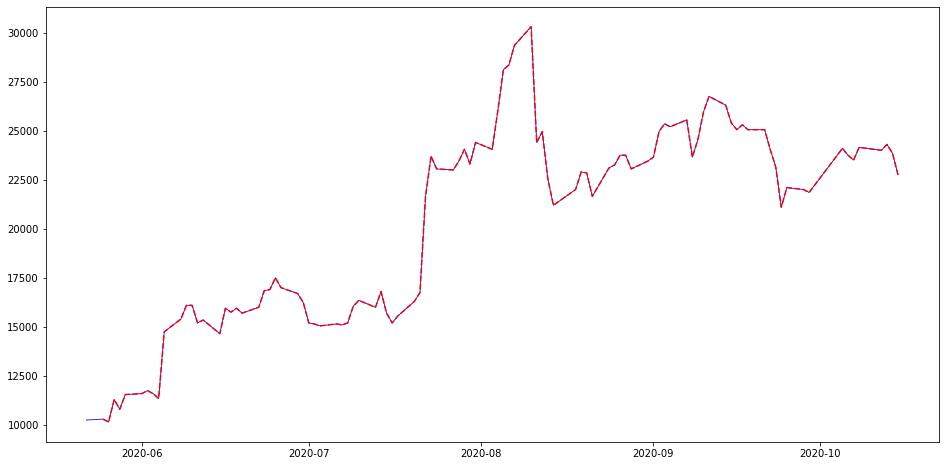

In [217]:
plt.figure(figsize=(16,8))
plt.plot(X_test.index,X_test['close'],'b',linewidth=0.8)
plt.plot(X_test.index , X_test['label'].shift(1),'r--')